
Kaggle
Rohit Sahoo · Updated 4 years ago
IBM Employee Dataset
Predict Employee Attrition **bold text**

About Dataset
Context
Watson Analytics Sample Data

Uncover the factors that lead to employee attrition and explore important questions such as show me a breakdown of distance from home by job role and attrition or compare average monthly income by education and attrition. This is a fictional data set created by IBM data scientists

Content
This the data about the employee on various factor influencing the attrition from the company.
Predict the Attrition of an employee based on the various factor given

Acknowledgements
IBM Blog on employee attrition

Inspiration
Predict the Attrition of an employee based on the various factor given

About Dataset
Education

'Below College'
'College'
'Bachelor'
'Master'
'Doctor'
EnvironmentSatisfaction

'Low'
'Medium'
'High'
'Very High'
JobInvolvement

'Low'
'Medium'
'High'
'Very High'
JobSatisfaction

'Low'
'Medium'
'High'
'Very High'
PerformanceRating

'Low'
'Good'
'Excellent'
'Outstanding'
RelationshipSatisfaction

'Low'
'Medium'
'High'
'Very High'
WorkLifeBalance

'Bad'
'Good'
'Better'
'Best'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Data preprocessing packages
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.utils import resample

#Data modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# New Section

In [ ]:
import duckdb

In [ ]:
cursor = duckdb.connect()
print(cursor.execute('SELECT 42').fetchall())

[(42,)]


In [ ]:
#duckdb.sql("SELECT * FROM 'train.csv' LIMIT 10")

duckdb.read_csv('train.csv', header=False)

┌──────────┬───────────┬───────────────────┬───────────┬────────────────────────┬──────────────────┬───────────┬──────────────────┬───────────────┬────────────────┬─────────────────────────┬──────────┬────────────┬────────────────┬──────────┬───────────────────────────┬─────────────────┬───────────────┬───────────────┬─────────────┬────────────────────┬──────────┬──────────┬───────────────────┬───────────────────┬──────────────────────────┬───────────────┬──────────────────┬───────────────────┬───────────────────────┬─────────────────┬────────────────┬────────────────────┬─────────────────────────┬──────────────────────┐
│ column00 │ column01  │     column02      │ column03  │        column04        │     column05     │ column06  │     column07     │   column08    │    column09    │        column10         │ column11 │  column12  │    column13    │ column14 │         column15          │    column16     │   column17    │   column18    │  column19   │      column20      │ column21 │ colu

In [ ]:
#duckdb.sql("SELECT * FROM EmployeeData LIMIT 5")

In [ ]:
duckdb.sql("CREATE TABLE EmployeeData AS SELECT * FROM 'train.csv'")

In [ ]:
result = duckdb.sql("SELECT * FROM 'train.csv'")

In [ ]:
duckdb.sql('SELECT * FROM EmployeeData ORDER BY Department DESC LIMIT 5')

┌───────┬───────────┬───────────────────┬───────────┬────────────┬──────────────────┬───────────┬──────────────────┬───────────────┬────────────────┬─────────────────────────┬─────────┬────────────┬────────────────┬──────────┬──────────────────────┬─────────────────┬───────────────┬───────────────┬─────────────┬────────────────────┬─────────┬──────────┬───────────────────┬───────────────────┬──────────────────────────┬───────────────┬──────────────────┬───────────────────┬───────────────────────┬─────────────────┬────────────────┬────────────────────┬─────────────────────────┬──────────────────────┐
│  Age  │ Attrition │  BusinessTravel   │ DailyRate │ Department │ DistanceFromHome │ Education │  EducationField  │ EmployeeCount │ EmployeeNumber │ EnvironmentSatisfaction │ Gender  │ HourlyRate │ JobInvolvement │ JobLevel │       JobRole        │ JobSatisfaction │ MaritalStatus │ MonthlyIncome │ MonthlyRate │ NumCompaniesWorked │ Over18  │ OverTime │ PercentSalaryHike │ PerformanceRating

In [ ]:
#result.fetchall()

In [ ]:
duckdb.sql('''SELECT JobRole FROM EmployeeData WHERE "Age" = (SELECT MAX(Age) FROM EmployeeData)''')

┌─────────────────┐
│     JobRole     │
│     varchar     │
├─────────────────┤
│ Manager         │
│ Sales Executive │
│ Sales Executive │
│ Sales Executive │
└─────────────────┘

In [ ]:
duckdb.sql('''SELECT StandardHours, HourlyRate, (StandardHours*HourlyRate) as Total FROM EmployeeData LIMIT 5''')

┌───────────────┬────────────┬───────┐
│ StandardHours │ HourlyRate │ Total │
│     int64     │   int64    │ int64 │
├───────────────┼────────────┼───────┤
│            80 │         94 │  7520 │
│            80 │         61 │  4880 │
│            80 │         92 │  7360 │
│            80 │         56 │  4480 │
│            80 │         40 │  3200 │
└───────────────┴────────────┴───────┘

In [ ]:
duckdb.sql("""
SELECT Department, AVG(StandardHours)
FROM EmployeeData
GROUP BY Department""")

┌────────────────────────┬────────────────────┐
│       Department       │ avg(StandardHours) │
│        varchar         │       double       │
├────────────────────────┼────────────────────┤
│ Human Resources        │               80.0 │
│ Sales                  │               80.0 │
│ Research & Development │               80.0 │
└────────────────────────┴────────────────────┘

In [ ]:
duckdb.sql("""SELECT Department, SUM(EmployeeCount) FROM EmployeeData GROUP BY Department""" )

┌────────────────────────┬────────────────────┐
│       Department       │ sum(EmployeeCount) │
│        varchar         │       int128       │
├────────────────────────┼────────────────────┤
│ Human Resources        │                 38 │
│ Sales                  │                319 │
│ Research & Development │                701 │
└────────────────────────┴────────────────────┘

In [ ]:
duckdb.sql(""" SELECT HourlyRate::float FROM EmployeeData""")

┌───────────────────────────┐
│ CAST(HourlyRate AS FLOAT) │
│           float           │
├───────────────────────────┤
│                      94.0 │
│                      61.0 │
│                      92.0 │
│                      56.0 │
│                      40.0 │
│                      79.0 │
│                      81.0 │
│                      67.0 │
│                      44.0 │
│                      94.0 │
│                        ·  │
│                        ·  │
│                        ·  │
│                      81.0 │
│                      96.0 │
│                      74.0 │
│                      79.0 │
│                      64.0 │
│                      93.0 │
│                      35.0 │
│                      71.0 │
│                      92.0 │
│                      51.0 │
├───────────────────────────┤
│   1058 rows (20 shown)    │
└───────────────────────────┘

In [ ]:
duckdb.sql("""
SELECT CAST("MonthlyIncome" AS float) AS MonthlyIncomeFloat
FROM EmployeeData
""")

┌────────────────────┐
│ MonthlyIncomeFloat │
│       float        │
├────────────────────┤
│             5993.0 │
│             5130.0 │
│             2090.0 │
│             2909.0 │
│             3468.0 │
│             3068.0 │
│             2670.0 │
│             2693.0 │
│             9526.0 │
│             5237.0 │
│                ·   │
│                ·   │
│                ·   │
│             4759.0 │
│             5301.0 │
│             3673.0 │
│             4768.0 │
│             1274.0 │
│             4900.0 │
│            10466.0 │
│            17007.0 │
│             2909.0 │
│             5765.0 │
├────────────────────┤
│     1058 rows      │
│     (20 shown)     │
└────────────────────┘

In [ ]:
duckdb.sql("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME='EmployeeData'")

┌──────────────────────────┐
│       column_name        │
│         varchar          │
├──────────────────────────┤
│ Age                      │
│ Attrition                │
│ BusinessTravel           │
│ DailyRate                │
│ Department               │
│ DistanceFromHome         │
│ Education                │
│ EducationField           │
│ EmployeeCount            │
│ EmployeeNumber           │
│       ·                  │
│       ·                  │
│       ·                  │
│ RelationshipSatisfaction │
│ StandardHours            │
│ StockOptionLevel         │
│ TotalWorkingYears        │
│ TrainingTimesLastYear    │
│ WorkLifeBalance          │
│ YearsAtCompany           │
│ YearsInCurrentRole       │
│ YearsSinceLastPromotion  │
│ YearsWithCurrManager     │
├──────────────────────────┤
│    35 rows (20 shown)    │
└──────────────────────────┘

"""
What factors affect attrition
1. Compensation and Benefits : Employees often leave for better-paying opportunities. If wages don't keep up with inflation or employee expectations, attrition rates can increase.
Factors: MonthlyIncome, OverTime, PercentSalaryHike, TrainingTimeLastYear, YearsSinceLastPromotion
2. Work Environment and Culture : High workloads and lack of work-life balance can lead to burnout and dissatisfaction, prompting employees to leave. Factors: EnvironmentSatisfaction, RelationshipSatisfaction, JobInvolvement, DistanceFromHome, Gender, RelationshipSatisfaction, BusinessTravel, YearsWithCurrManager, MaritalStatus
3. Job Satisfaction and Engagement : Lack of opportunities for growth and advancement can cause employees to seek better prospects elsewhere.
Factors: Department, Education, PerformanceRating, timesincelastpromotion, StockOptionLevel, JobSatisfaction, YearsInCurrentRole,YearsAtCompany
"""

In [ ]:
df = duckdb.sql("SELECT * FROM EmployeeData").fetchdf()
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [ ]:
#query1 = duckdb.sql("SELECT attrition, Department, MonthlyIncome, OverTime, PercentSalaryHike, TrainingTimesLastYear, YearsSinceLastPromotion FROM EmployeeData")
query1 = duckdb.sql("SELECT attrition, MonthlyIncome, OverTime, PercentSalaryHike, TrainingTimesLastYear, YearsSinceLastPromotion FROM EmployeeData")
df1 = query1.fetchdf()

In [ ]:
df1.head(3)

,Attrition,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion
0,1,5993,True,11,0,0
1,0,5130,False,23,3,1
2,1,2090,True,15,3,0


In [ ]:
import pandas as pd
df1 = pd.get_dummies(df1)
df1.head(2)

,Attrition,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion
0,1,5993,True,11,0,0
1,0,5130,False,23,3,1


In [ ]:
df1.describe()

,Attrition,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,0.169187,6625.945180,15.155955,2.769376,2.203214
std,0.375094,4837.695042,3.641097,1.302689,3.266948
min,0.000000,1009.000000,11.000000,0.000000,0.000000
25%,0.000000,2900.250000,12.000000,2.000000,0.000000
50%,0.000000,4903.500000,14.000000,3.000000,1.000000
75%,0.000000,8736.500000,18.000000,3.000000,3.000000
max,1.000000,19999.000000,25.000000,6.000000,15.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Attrition                1058 non-null   int64
 1   MonthlyIncome            1058 non-null   int64
 2   OverTime                 1058 non-null   bool 
 3   PercentSalaryHike        1058 non-null   int64
 4   TrainingTimesLastYear    1058 non-null   int64
 5   YearsSinceLastPromotion  1058 non-null   int64
dtypes: bool(1), int64(5)
memory usage: 42.5 KB


In [ ]:
df1 = df1.astype(int)
df1.head(2)

,Attrition,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion
0,1,5993,1,11,0,0
1,0,5130,0,23,3,1


In [ ]:
#Imbalanced DataSet
df1['Attrition'].value_counts()

,count
Attrition,
0,879
1,179


In [ ]:
duckdb.sql("SELECT Attrition, COUNT(*) AS count FROM EmployeeData GROUP BY Attrition")

┌───────────┬───────┐
│ Attrition │ count │
│   int64   │ int64 │
├───────────┼───────┤
│         0 │   879 │
│         1 │   179 │
└───────────┴───────┘

In [ ]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
#Separate features Y and X
df1_y = df1['Attrition']
df1_y.head(2)

df1_X = df1.drop('Attrition', axis=1)

df1_X.head(2)

#Applying balancing technique - SMOTE
smote = SMOTE(random_state = 42)

df1_resampled_X, df1_resampled_y= smote.fit_resample(df1_X,df1_y)

df1_balanced = pd.concat([df1_resampled_y, df1_resampled_X], axis=1)
df1_balanced.head(2)

,Attrition,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion
0,1,5993,1,11,0,0
1,0,5130,0,23,3,1


In [ ]:
df1_balanced['Attrition'].value_counts()

,count
Attrition,
1,879
0,879


In [ ]:
df1 = df1_balanced.drop_duplicates()
df1_balanced['Attrition'].value_counts()

,count
Attrition,
1,879
0,879


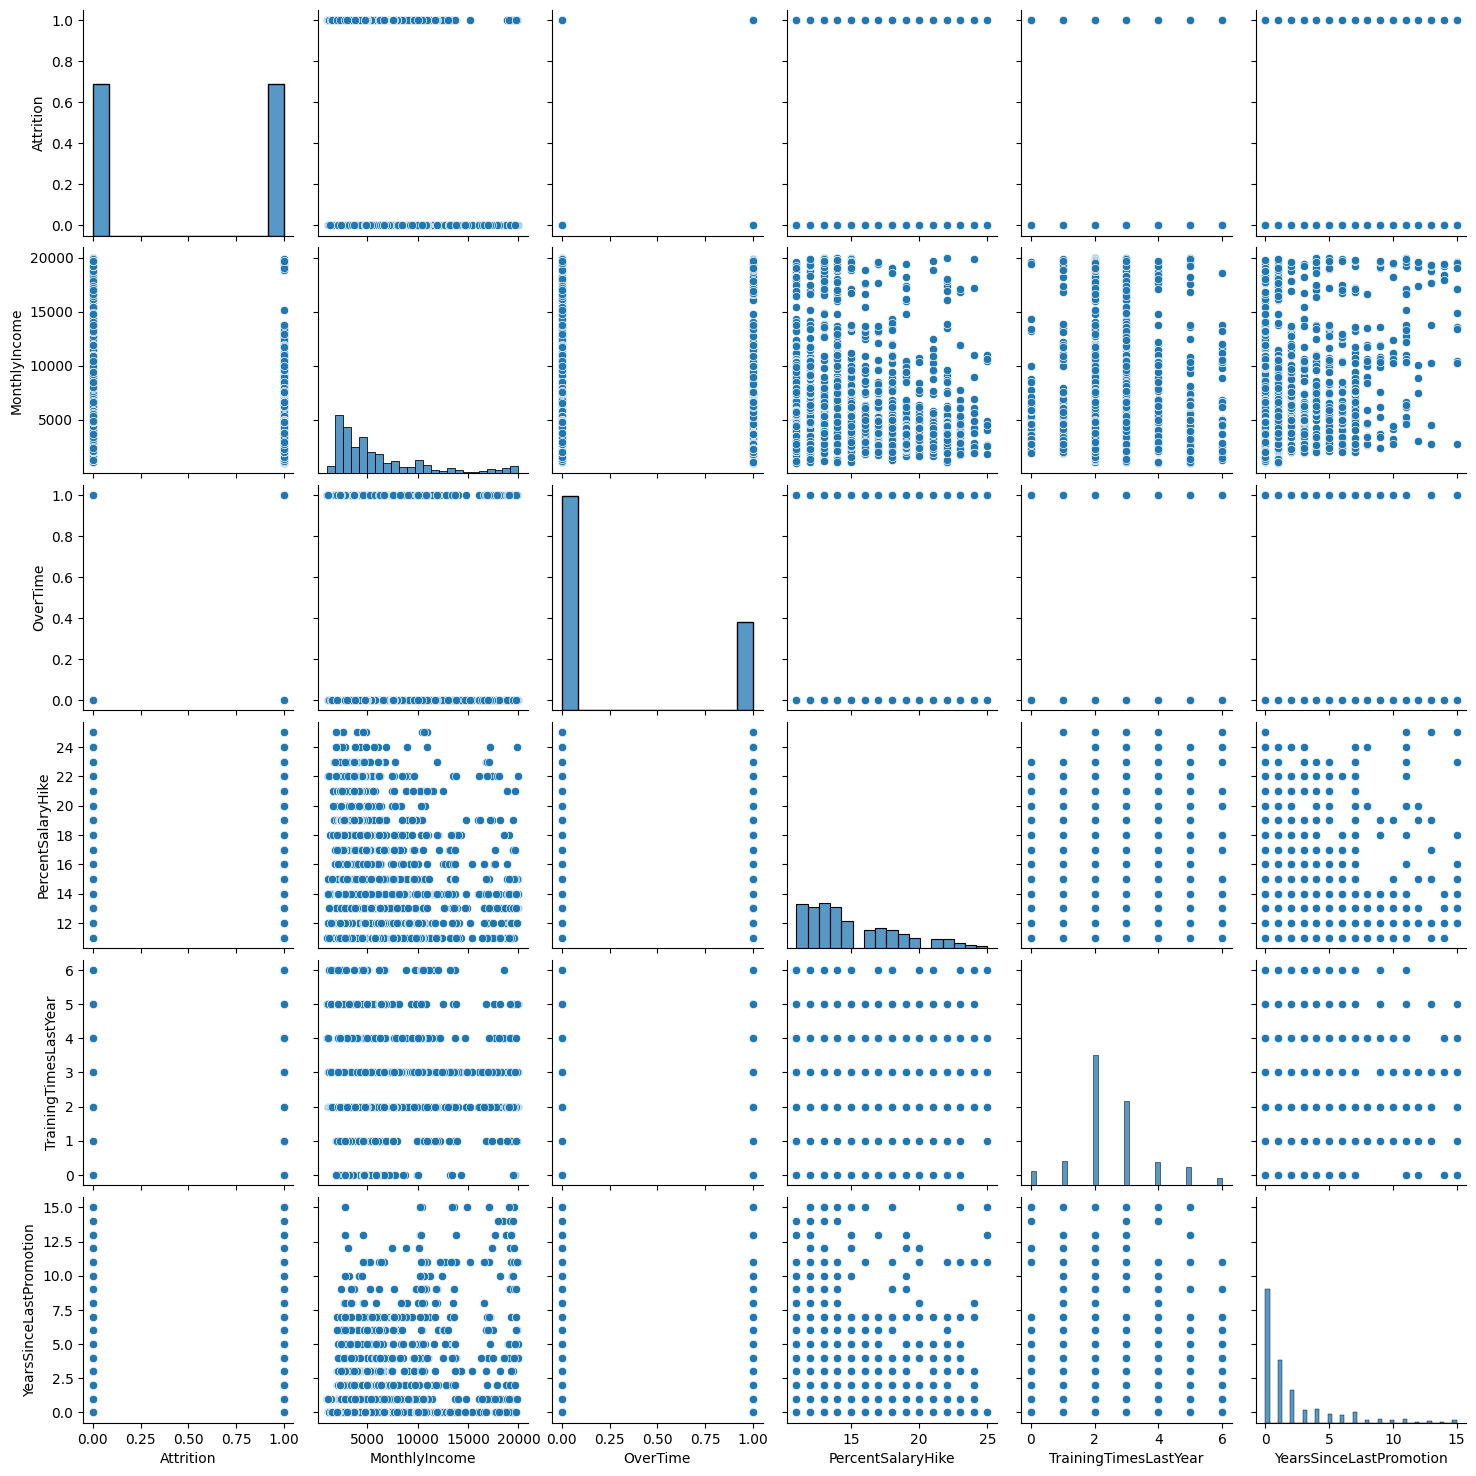

In [ ]:
import pandas as pd
import seaborn as sns

sns.pairplot(df1_balanced)


In [ ]:
#Build Logistic Regression Model
df1_resampled_y.head(3)

,Attrition
0,1
1,0
2,1


In [ ]:
df1_resampled_X.head(3)

,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,YearsSinceLastPromotion
0,5993,1,11,0,0
1,5130,0,23,3,1
2,2090,1,15,3,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_balanced_scaled = scaler.fit_transform(df1_balanced)

df1_X = df1_balanced_scaled[:,1:]
df1_y = df1_balanced_scaled[:,0]

In [ ]:
df1_X_train, df1_X_test, df1_y_train, df1_y_test = train_test_split(df1_X, df1_y, test_size=0.25, random_state=0)

In [ ]:


df1_log_clf = LogisticRegression(random_state=0, max_iter=1500).fit(df1_X_train, df1_y_train)

In [ ]:
#Predict
df1_y_pred = df1_log_clf.predict(df1_X_test)

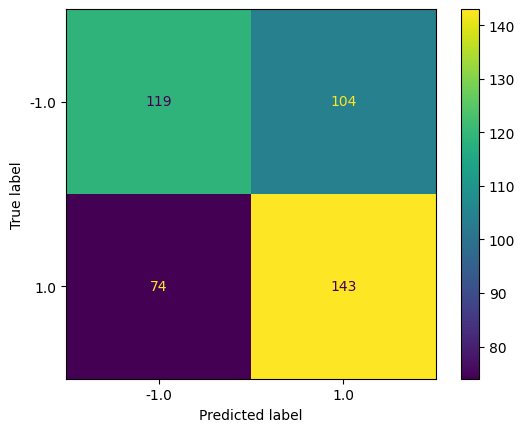

In [ ]:
#Visualize Model Results
df1_log_cm = confusion_matrix(df1_y_test, df1_y_pred, labels=df1_log_clf.classes_ )

#Display confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=df1_log_cm, display_labels = df1_log_clf.classes_)

#Plot confusion matrix
log_disp.plot()

plt.show()

In [ ]:
target_labels = ["Attrition Yes", "Attrition No"]

print(classification_report(df1_y_test, df1_y_pred, target_names = target_labels))

               precision    recall  f1-score   support

Attrition Yes       0.62      0.53      0.57       223
 Attrition No       0.58      0.66      0.62       217

     accuracy                           0.60       440
    macro avg       0.60      0.60      0.59       440
 weighted avg       0.60      0.60      0.59       440



In [ ]:
#Interpreting model coeffiecients
#Interpreting model coeffiecients
df1_X_column_names = df1_resampled_X.columns.to_list()
df1_X_column_names = pd.DataFrame(data={"Feature Names":df1_X_column_names})

output = pd.DataFrame(data={"Model Coefficient":df1_log_clf.coef_[0]})

results = pd.concat([df1_X_column_names, output], axis=1)
results

,Feature Names,Model Coefficient
0,MonthlyIncome,-0.478791
1,OverTime,0.160928
2,PercentSalaryHike,-0.165882
3,TrainingTimesLastYear,-0.442009
4,YearsSinceLastPromotion,-0.057417


### Summary of Attrition Prediction Results

#### Key Features and Their Coefficients

1. **Monthly Income (-0.478791)**: Higher monthly income significantly reduces the likelihood of attrition.
2. **Training Times Last Year (-0.442009)**: More training sessions last year significantly decrease the likelihood of attrition.
3. **Percent Salary Hike (-0.165882)**: A higher percent salary hike slightly reduces the likelihood of attrition.
4. **Years Since Last Promotion (-0.057417)**: Fewer years since the last promotion minimally reduce the likelihood of attrition.
5. **OverTime (0.160928)**: Working overtime increases the likelihood of attrition.

### Interpretation
- **Monthly Income**: Providing higher monthly income can significantly reduce employee attrition, indicating the importance of competitive compensation.
- **Training Times Last Year**: Offering more training sessions reduces attrition, highlighting the value of employee development and continuous learning opportunities.
- **Percent Salary Hike**: Salary increases slightly help in retaining employees, reflecting the positive impact of regular salary adjustments.
- **Years Since Last Promotion**: Promotion frequency has a minimal effect, suggesting that other factors may play a more significant role in retention.
- **OverTime**: Working overtime increases the likelihood of attrition, emphasizing the need for work-life balance and managing workload to prevent burnout.

### Summary
To reduce employee attrition, organizations should focus on providing competitive compensation, offering regular training and development opportunities, and managing overtime to ensure work-life balance. Regular salary hikes and timely promotions can also help in retaining employees.


CASE 2:
Work Environment and Culture : High workloads and lack of work-life balance can lead to burnout and dissatisfaction, prompting employees to leave. Factors: EnvironmentSatisfaction, RelationshipSatisfaction, JobInvolvement, DistanceFromHome, Gender, BusinessTravel, YearsWithCurrManager, MaritalStatus

In [ ]:
df2 = duckdb.sql("SELECT Attrition, Gender, MaritalStatus, DistanceFromHome, BusinessTravel,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement, YearsWithCurrManager FROM EmployeeData").fetchdf()

In [ ]:
df2.head(2)

,Attrition,Gender,MaritalStatus,DistanceFromHome,BusinessTravel,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,YearsWithCurrManager
0,1,Female,Single,1,Travel_Rarely,1,2,3,5
1,0,Male,Married,8,Travel_Frequently,4,3,2,7


In [ ]:
df2 = pd.get_dummies(df2)
df2.head(2)

,Attrition,DistanceFromHome,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1,1,1,2,3,5,True,False,False,False,True,False,False,True
1,0,8,4,3,2,7,False,True,False,True,False,False,True,False


In [ ]:
df2 = df2.astype(int)
df2.head(3)

,Attrition,DistanceFromHome,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1,1,1,2,3,5,1,0,0,0,1,0,0,1
1,0,8,4,3,2,7,0,1,0,1,0,0,1,0
2,1,2,2,4,2,0,0,1,0,0,1,0,0,1


In [ ]:
df2['Attrition'].value_counts()

,count
Attrition,
0,879
1,179


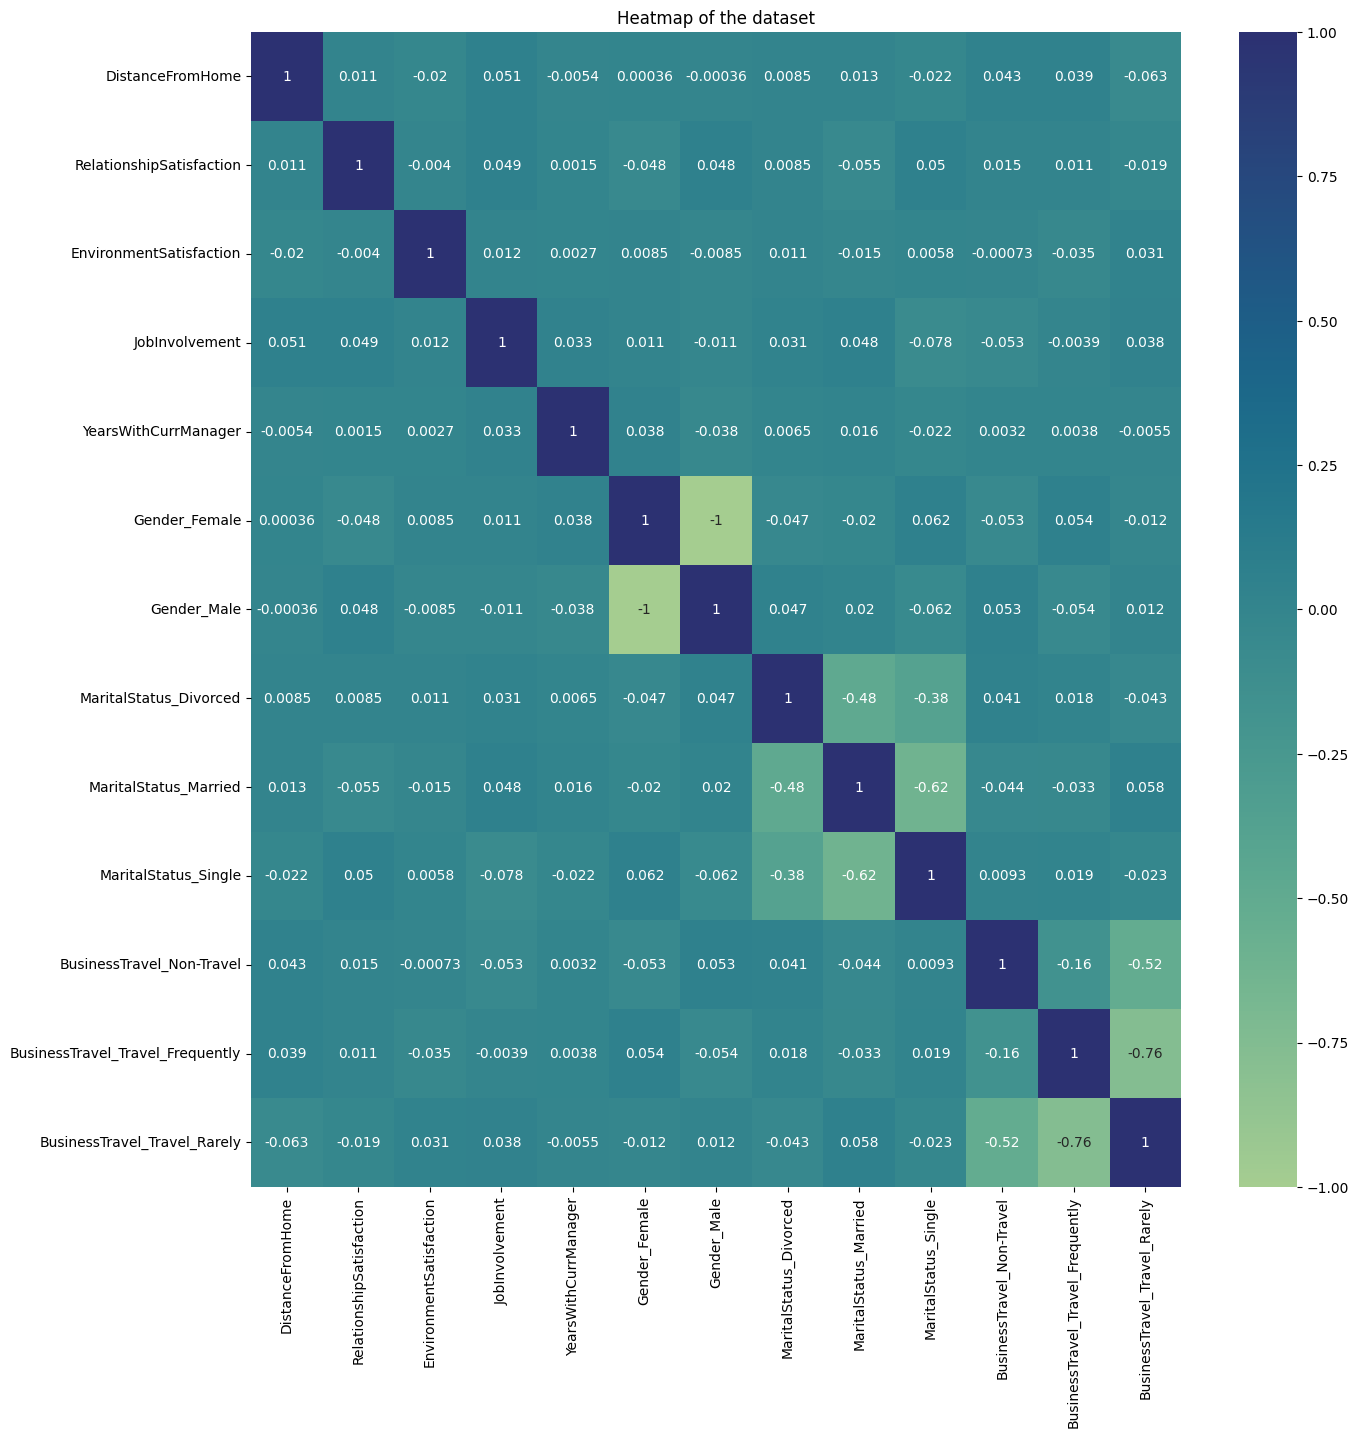

In [ ]:

plt.figure(figsize=(15,15))
sns.heatmap(df2[['DistanceFromHome','RelationshipSatisfaction','EnvironmentSatisfaction','JobInvolvement','YearsWithCurrManager','Gender_Female','Gender_Male','MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single','BusinessTravel_Non-Travel','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely']]
    .corr(numeric_only = True),
    annot=True,
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
#Separate features Y and X
df2_y = df2['Attrition']
df2_y.head(2)

df2_X = df2.drop('Attrition', axis=1)

df2_X.head(2)

#Applying balancing technique - SMOTE
smote = SMOTE(random_state = 42)

df2_resampled_X, df2_resampled_y= smote.fit_resample(df2_X,df2_y)

df2_balanced = pd.concat([df2_resampled_y, df2_resampled_X], axis=1)
df2_balanced.head(2)

,Attrition,DistanceFromHome,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1,1,1,2,3,5,1,0,0,0,1,0,0,1
1,0,8,4,3,2,7,0,1,0,1,0,0,1,0


In [ ]:
df2_balanced = df2_balanced.drop_duplicates()
df2_balanced['Attrition'].value_counts()

,count
Attrition,
0,872
1,620


In [ ]:
df2_balanced_y = df2_balanced['Attrition']
df2_balanced_y.head(2)

df2_balanced_X = df2_balanced.drop('Attrition', axis=1)

df2_balanced_X.head(2)

,DistanceFromHome,RelationshipSatisfaction,EnvironmentSatisfaction,JobInvolvement,YearsWithCurrManager,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1,1,2,3,5,1,0,0,0,1,0,0,1
1,8,4,3,2,7,0,1,0,1,0,0,1,0


In [ ]:
#Train and Test data
df2_balanced_X_train, df2_balanced_X_test, df2_balanced_y_train, df2_balanced_y_test = train_test_split(df2_balanced_X, df2_balanced_y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_balanced_X_train = scaler.fit_transform(df2_balanced_X_train)

#df2_balanced_y_train = scaler.fit_transform(df2_balanced_y_train)

df2_balanced_X_test = scaler.fit_transform(df2_balanced_X_test)

#df2_balanced_y_test = scaler.fit_transform(df2_balanced_y_test)

In [ ]:
#Logical Regression

df2_log_clf = LogisticRegression(random_state=0, max_iter=1500).fit(df2_balanced_X_train, df2_balanced_y_train)



In [ ]:
#Predict
df2_y_pred = df2_log_clf.predict(df2_balanced_X_test)

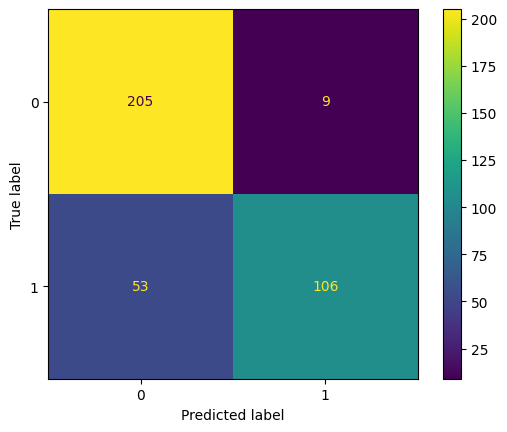

In [ ]:
#Visualize Model Results
log_cm = confusion_matrix(df2_balanced_y_test, df2_y_pred, labels=df2_log_clf.classes_ )

#Display confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels = df2_log_clf.classes_)

#Plot confusion matrix
log_disp.plot()

plt.show()

In [ ]:
target_labels = ["Attrition Yes", "Attrition No"]

print(classification_report(df2_balanced_y_test, df2_y_pred, target_names = target_labels))

               precision    recall  f1-score   support

Attrition Yes       0.79      0.96      0.87       214
 Attrition No       0.92      0.67      0.77       159

     accuracy                           0.83       373
    macro avg       0.86      0.81      0.82       373
 weighted avg       0.85      0.83      0.83       373



In [ ]:
#Interpreting model coeffiecients
df2_X_column_names = df2_balanced_X.columns.to_list()
df2_X_column_names = pd.DataFrame(data={"Feature Names":df2_X_column_names})

output = pd.DataFrame(data={"Model Coefficient":df2_log_clf.coef_[0]})

results = pd.concat([df2_X_column_names, output], axis=1)
results

,Feature Names,Model Coefficient
0,DistanceFromHome,0.222435
1,RelationshipSatisfaction,-0.086637
2,EnvironmentSatisfaction,-0.374364
3,JobInvolvement,-0.578196
4,YearsWithCurrManager,-0.384024
5,Gender_Female,-2.018634
6,Gender_Male,-1.934092
7,MaritalStatus_Divorced,-1.786612
8,MaritalStatus_Married,-1.979205
9,MaritalStatus_Single,-1.502800


Summary of Logistic Regression Results:CASE 2

Positive Influence
DistanceFromHome (0.222435): This feature has a positive coefficient, indicating that as the distance from home increases, the likelihood of attrition increases slightly. Employees who live further away from work might be more likely to leave the company.

Negative Influence
Negative coefficients imply that as the value of these features increases, the likelihood of attrition decreases. Let's go through each:

RelationshipSatisfaction (-0.086637): As relationship satisfaction increases, the likelihood of attrition decreases slightly. Employees who are more satisfied with their relationships are less likely to leave.

EnvironmentSatisfaction (-0.374364): Higher environment satisfaction significantly reduces the likelihood of attrition. Employees who are more satisfied with their work environment are less likely to leave.

JobInvolvement (-0.578196): Increased job involvement strongly reduces the likelihood of attrition. Employees who are more involved in their job are less likely to leave.

YearsWithCurrManager (-0.384024): More years with the current manager notably decreases the likelihood of attrition. Employees who have spent more time with their current manager are less likely to leave.

Gender_Female (-2.018634) and Gender_Male (-1.934092): Both genders have strong negative coefficients, with a slightly higher impact for females. This suggests that, regardless of gender, the likelihood of attrition is significantly reduced.

MaritalStatus_Divorced (-1.786612), MaritalStatus_Married (-1.979205), MaritalStatus_Single (-1.502800): All marital statuses show strong negative impacts, indicating that marital status, in general, lowers the likelihood of attrition. Married individuals have the strongest negative impact, followed by divorced and then single individuals.

BusinessTravel_Non-Travel (-1.195279), BusinessTravel_Travel_Frequently (-1.150838), BusinessTravel_Travel_Rarely (-1.662230): All business travel statuses have negative impacts, suggesting that the less frequently an employee travels for business, the lower the likelihood of attrition. Employees who travel rarely have the strongest negative impact.

CASE 3:
Job Satisfaction and Engagement : Lack of opportunities for growth and advancement can cause employees to seek better prospects elsewhere.
Factors: Department, Education, PerformanceRating, timesincelastpromotion, StockOptionLevel, JobSatisfaction, YearsInCurrentRole,YearsAtCompany

In [ ]:
query3 = duckdb.sql("SELECT attrition, Department, Education, YearsAtCompany, YearsInCurrentRole, PerformanceRating, StockOptionLevel, Jobsatisfaction  FROM EmployeeData")
df3 = query3.fetchdf()

In [ ]:
df3.head(3)

,Attrition,Department,Education,YearsAtCompany,YearsInCurrentRole,PerformanceRating,StockOptionLevel,JobSatisfaction
0,1,Sales,2,6,4,3,0,4
1,0,Research & Development,1,10,7,4,1,2
2,1,Research & Development,2,0,0,3,0,3


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attrition           1058 non-null   int64 
 1   Department          1058 non-null   object
 2   Education           1058 non-null   int64 
 3   YearsAtCompany      1058 non-null   int64 
 4   YearsInCurrentRole  1058 non-null   int64 
 5   PerformanceRating   1058 non-null   int64 
 6   StockOptionLevel    1058 non-null   int64 
 7   JobSatisfaction     1058 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 66.3+ KB


In [ ]:
df3.describe()

,Attrition,Education,YearsAtCompany,YearsInCurrentRole,PerformanceRating,StockOptionLevel,JobSatisfaction
count,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000,1058.000000
mean,0.169187,2.879017,7.065217,4.26087,3.150284,0.762760,2.749527
std,0.375094,1.031442,6.265227,3.61747,0.357518,0.837537,1.104144
min,0.000000,1.000000,0.000000,0.00000,3.000000,0.000000,1.000000
25%,0.000000,2.000000,3.000000,2.00000,3.000000,0.000000,2.000000
50%,0.000000,3.000000,5.000000,3.00000,3.000000,1.000000,3.000000
75%,0.000000,4.000000,9.000000,7.00000,3.000000,1.000000,4.000000
max,1.000000,5.000000,40.000000,18.00000,4.000000,3.000000,4.000000


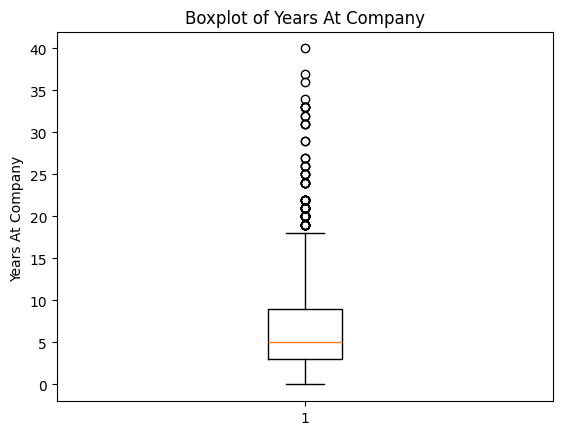

In [ ]:
plt.boxplot(df['YearsAtCompany'])
plt.ylabel('Years At Company ')
plt.title('Boxplot of Years At Company')
plt.show()

In [ ]:
greaterThan18 = duckdb.sql("SELECT COUNT(YearsAtCompany) FROM EmployeeData WHERE YearsAtCompany > 18")
greaterThan18

┌───────────────────────┐
│ count(YearsAtCompany) │
│         int64         │
├───────────────────────┤
│                    79 │
└───────────────────────┘

In [ ]:
df['YearsAtCompany'].value_counts().sort_index(ascending=True)

,count
YearsAtCompany,
0,31
1,128
2,88
3,98
4,75
5,133
6,57
7,64
8,65


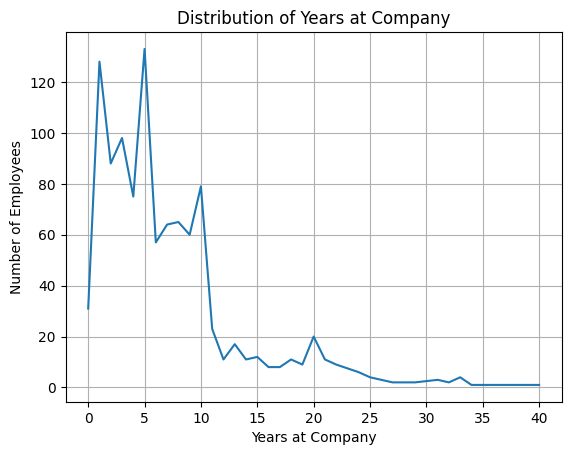

In [ ]:
# Calculate value counts and sort by index
years_at_company_counts = df['YearsAtCompany'].value_counts().sort_index()

# Create the line plot
plt.plot(years_at_company_counts.index,years_at_company_counts.values )

# Customize the plot
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.title('Distribution of Years at Company')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Calculate IQR
Q1 = df3['YearsAtCompany'].quantile(0.25)
Q3 = df3['YearsAtCompany'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df3_no_outliers = df3[~((df3['YearsAtCompany'] < (Q1 - 1.5 * IQR)) | (df3['YearsAtCompany'] > (Q3 + 1.5 * IQR)))]

print(df3_no_outliers)
df3_no_outliers['YearsAtCompany'].value_counts()

      Attrition              Department  Education  YearsAtCompany  \
0             1                   Sales          2               6   
1             0  Research & Development          1              10   
2             1  Research & Development          2               0   
3             0  Research & Development          4               8   
4             0  Research & Development          1               2   
...         ...                     ...        ...             ...   
1053          0  Research & Development          2              12   
1054          0  Research & Development          4               8   
1055          0  Research & Development          3              14   
1056          1                   Sales          3               3   
1057          1                   Sales          3               5   

      YearsInCurrentRole  PerformanceRating  StockOptionLevel  JobSatisfaction  
0                      4                  3                 0                4

,count
YearsAtCompany,
5,133
1,128
3,98
2,88
10,79
4,75
8,65
7,64
9,60


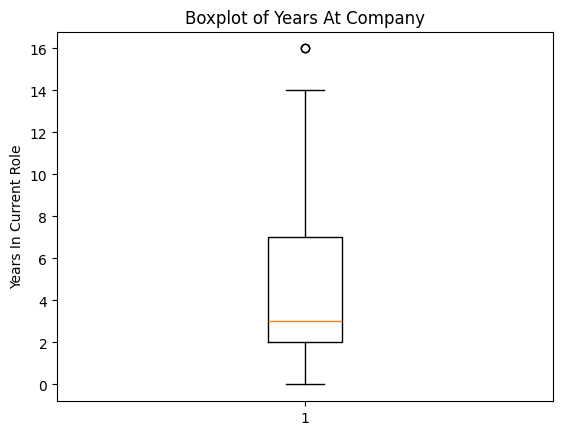

In [ ]:
plt.boxplot(df3_no_outliers['YearsInCurrentRole'])
plt.ylabel('Years In Current Role')
plt.title('Boxplot of Years At Company')
plt.show()

In [ ]:
df3_no_outliers['YearsAtCompany'].value_counts().sort_index(ascending=True)

,count
YearsAtCompany,
0,31
1,128
2,88
3,98
4,75
5,133
6,57
7,64
8,65


In [ ]:
df3_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attrition           979 non-null    int64 
 1   Department          979 non-null    object
 2   Education           979 non-null    int64 
 3   YearsAtCompany      979 non-null    int64 
 4   YearsInCurrentRole  979 non-null    int64 
 5   PerformanceRating   979 non-null    int64 
 6   StockOptionLevel    979 non-null    int64 
 7   JobSatisfaction     979 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 68.8+ KB


In [ ]:
# Calculate IQR
Q1 = df3['YearsAtCompany'].quantile(0.25)
Q3 = df3['YearsAtCompany'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df3_no_outliers = df3[~((df3['YearsAtCompany'] < (Q1 - 1.5 * IQR)) | (df3['YearsAtCompany'] > (Q3 + 1.5 * IQR)))]

print(df3_no_outliers)
df3_no_outliers['YearsAtCompany'].value_counts()

      Attrition              Department  Education  YearsAtCompany  \
0             1                   Sales          2               6   
1             0  Research & Development          1              10   
2             1  Research & Development          2               0   
3             0  Research & Development          4               8   
4             0  Research & Development          1               2   
...         ...                     ...        ...             ...   
1053          0  Research & Development          2              12   
1054          0  Research & Development          4               8   
1055          0  Research & Development          3              14   
1056          1                   Sales          3               3   
1057          1                   Sales          3               5   

      YearsInCurrentRole  PerformanceRating  StockOptionLevel  JobSatisfaction  
0                      4                  3                 0                4

,count
YearsAtCompany,
5,133
1,128
3,98
2,88
10,79
4,75
8,65
7,64
9,60


In [ ]:
df3_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attrition           979 non-null    int64 
 1   Department          979 non-null    object
 2   Education           979 non-null    int64 
 3   YearsAtCompany      979 non-null    int64 
 4   YearsInCurrentRole  979 non-null    int64 
 5   PerformanceRating   979 non-null    int64 
 6   StockOptionLevel    979 non-null    int64 
 7   JobSatisfaction     979 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 68.8+ KB


In [ ]:
df3_no_outliers['Attrition'].value_counts()

,count
Attrition,
0,808
1,171


In [ ]:
df3_no_outliers = pd.get_dummies(df3_no_outliers)
df3_no_outliers = df3_no_outliers.astype(int)
df3_no_outliers.head(2)

,Attrition,Education,YearsAtCompany,YearsInCurrentRole,PerformanceRating,StockOptionLevel,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales
0,1,2,6,4,3,0,4,0,0,1
1,0,1,10,7,4,1,2,0,1,0


In [ ]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
#Separate features Y and X
df3_no_outliers_y = df3_no_outliers['Attrition']
df3_no_outliers_y.head(2)

df3_no_outliers_X = df3_no_outliers.drop('Attrition', axis=1)

df3_no_outliers_X.head(2)

#Applying balancing technique - SMOTE
smote = SMOTE(random_state = 42)

df3_resampled_X, df3_resampled_y= smote.fit_resample(df3_no_outliers_X, df3_no_outliers_y)

df3_balanced = pd.concat([df3_resampled_y, df3_resampled_X], axis=1)
df3_balanced.head(2)

,Attrition,Education,YearsAtCompany,YearsInCurrentRole,PerformanceRating,StockOptionLevel,JobSatisfaction,Department_Human Resources,Department_Research & Development,Department_Sales
0,1,2,6,4,3,0,4,0,0,1
1,0,1,10,7,4,1,2,0,1,0


In [ ]:
#Applying Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3_balanced = scaler.fit_transform(df3_balanced)


In [ ]:
df3_balanced_scaled_X = df3_balanced[:,1:]
df3_balanced_scaled_y = df3_balanced[:,0]

In [ ]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test = train_test_split(df3_balanced_scaled_X, df3_balanced_scaled_y, test_size=0.25, random_state=0)

In [ ]:
#Logical Regression

df3_log_clf = LogisticRegression(random_state=0, max_iter=1500).fit(df3_X_train, df3_y_train)



In [ ]:
#Predict
df3_y_pred = df3_log_clf.predict(df3_X_test)

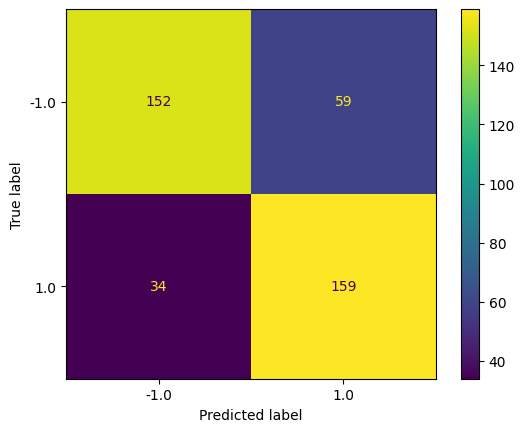

In [ ]:
#Visualize Model Results
log_cm = confusion_matrix(df3_y_test, df3_y_pred, labels=df3_log_clf.classes_ )

#Display confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels = df3_log_clf.classes_)

#Plot confusion matrix
log_disp.plot()

plt.show()

In [ ]:
target_labels = ["Attrition Yes", "Attrition No"]

print(classification_report(df3_y_test, df3_y_pred, target_names = target_labels))

               precision    recall  f1-score   support

Attrition Yes       0.82      0.72      0.77       211
 Attrition No       0.73      0.82      0.77       193

     accuracy                           0.77       404
    macro avg       0.77      0.77      0.77       404
 weighted avg       0.78      0.77      0.77       404



In [ ]:
#Interpreting model coeffiecients
df3_X_column_names = df3_no_outliers_X.columns.to_list()
df3_X_column_names = pd.DataFrame(data={"Feature Names":df3_X_column_names})

output = pd.DataFrame(data={"Model Coefficient":df3_log_clf.coef_[0]})

results = pd.concat([df3_X_column_names, output], axis=1)
results

,Feature Names,Model Coefficient
0,Education,-0.204187
1,YearsAtCompany,-0.209681
2,YearsInCurrentRole,-0.431459
3,PerformanceRating,-0.231115
4,StockOptionLevel,-0.813856
5,JobSatisfaction,-0.446598
6,Department_Human Resources,-0.801804
7,Department_Research & Development,-2.193438
8,Department_Sales,-1.959948


Here are the provided features and their model coefficients, ordered from the greatest influence to the least in predicting attrition:

### Key Features and Their Coefficients
1. **Department (Research & Development) (-2.193438)**: Greatest negative impact on attrition.
2. **Department (Sales) (-1.959948)**: Significant negative impact on attrition.
3. **Stock Option Level (-0.813856)**: Strong negative impact on attrition.
4. **Department (Human Resources) (-0.801804)**: Substantial negative impact on attrition.
5. **Job Satisfaction (-0.446598)**: Significant negative impact on attrition.
6. **Years in Current Role (-0.431459)**: Notable negative impact on attrition.
7. **Performance Rating (-0.231115)**: Moderate negative impact on attrition.
8. **Years at Company (-0.209681)**: Slight negative impact on attrition.
9. **Education (-0.204187)**: Slight negative impact on attrition.

### Summary
- **Department (Research & Development)** and **Sales** have the greatest influence in reducing attrition probability.
- **Stock Option Level** and **Department (Human Resources)** also significantly reduce the likelihood of attrition.
- **Job Satisfaction**, **Years in Current Role**, and **Performance Rating** have notable negative impacts on attrition.
- **Years at Company** and **Education** have relatively smaller, but still negative, impacts on attrition.

Understanding these relationships helps organizations identify key areas to focus on in order to retain employees and reduce turnover.


Additional inferences from the data:

1. **Department Influence**:
   - Employees in the Research & Development department have the highest reduction in attrition probability, suggesting that this department may have higher job satisfaction, better work environments, or stronger retention strategies.
   - Conversely, while Sales and Human Resources also show significant negative impacts, R&D stands out more prominently.

2. **Impact of Gender and Marital Status**:
   - Gender seems to play a notable role, with both female and male coefficients indicating a substantial negative impact on attrition. This may suggest a gender-neutral retention strategy or similar job satisfaction levels across genders.
   - Marital status also affects attrition, with married employees less likely to leave compared to single or divorced employees. This could imply that married employees may have stronger commitments or fewer opportunities to relocate for job changes.

3. **Job Satisfaction and Involvement**:
   - Higher job satisfaction and involvement significantly decrease the likelihood of attrition, highlighting the importance of creating a fulfilling work environment and engaging employees in meaningful tasks.

4. **Training and Development**:
   - More training times last year significantly reduce the likelihood of attrition, emphasizing the importance of investing in employee development and continuous learning opportunities.

5. **Performance and Rewards**:
   - Higher performance ratings and stock option levels are associated with lower attrition rates, indicating that rewarding high-performing employees and offering stock options can be effective retention strategies.

6. **Work Environment and Management**:
   - Positive environment satisfaction and longer years with the current manager decrease the likelihood of attrition, suggesting that a supportive work environment and stable management relationships contribute to employee retention.

7. **Overtime and Distance from Home**:
   - Overtime and distance from home increase the likelihood of attrition. This suggests that work-life balance and commute times are crucial factors in employee retention, and addressing these issues could help reduce turnover.

### Summary
The data highlights that job satisfaction, employee development, rewarding high performance, and creating a supportive work environment are key factors in reducing attrition. Additionally, addressing work-life balance and commute times can further help in retaining employees. By focusing on these areas, organizations can develop targeted strategies to reduce turnover and improve employee retention.



All the features combined, ordered from the greatest influence to the least in predicting attrition, based on their absolute model coefficient values:

### Key Features and Their Coefficients
1. **Department (Research & Development) (-2.193438)**: Greatest negative impact on attrition.
2. **Gender (Female) (-2.018634)**: Substantial negative impact on attrition.
3. **Department (Sales) (-1.959948)**: Significant negative impact on attrition.
4. **Gender (Male) (-1.934092)**: Significant negative impact on attrition.
5. **Marital Status (Married) (-1.979205)**: Strong negative impact on attrition.
6. **Business Travel (Travel Rarely) (-1.662230)**: Substantial negative impact on attrition.
7. **Marital Status (Single) (-1.502800)**: Significant negative impact on attrition.
8. **Marital Status (Divorced) (-1.786612)**: Notable negative impact on attrition.
9. **Business Travel (Non-Travel) (-1.195279)**: Moderate negative impact on attrition.
10. **Business Travel (Travel Frequently) (-1.150838)**: Moderate negative impact on attrition.
11. **Stock Option Level (-0.813856)**: Strong negative impact on attrition.
12. **Department (Human Resources) (-0.801804)**: Substantial negative impact on attrition.
13. **Job Involvement (-0.578196)**: Significant negative impact on attrition.
14. **Job Satisfaction (-0.446598)**: Strong negative impact on attrition.
15. **Years in Current Role (-0.431459)**: Notable negative impact on attrition.
16. **Years With Current Manager (-0.384024)**: Significant negative impact on attrition.
17. **Environment Satisfaction (-0.374364)**: Significant negative impact on attrition.
18. **Training Times Last Year (-0.359304)**: Significant negative impact on attrition.
19. **Performance Rating (-0.231115)**: Moderate negative impact on attrition.
20. **Percent Salary Hike (-0.049139)**: Slight negative impact on attrition.
21. **Years at Company (-0.209681)**: Slight negative impact on attrition.
22. **Education (-0.204187)**: Slight negative impact on attrition.
23. **Relationship Satisfaction (-0.086637)**: Slight negative impact on attrition.
24. **Years Since Last Promotion (-0.018971)**: Slight negative impact on attrition.
25. **Monthly Income (-0.000106)**: Almost negligible impact on attrition.
26. **Distance From Home (0.222435)**: Increases the probability of attrition.
27. **OverTime (0.349396)**: Increases the likelihood of attrition.

### Summary
- **Department (Research & Development)**, **Gender (Female)**, and **Department (Sales)** have the greatest influence in reducing attrition probability.
- **Stock Option Level**, **Job Satisfaction**, and **Years in Current Role** also significantly reduce the likelihood of attrition.
- Factors like **Training Times Last Year**, **Percent Salary Hike**, and **Performance Rating** have notable negative impacts on attrition.
- **Years at Company**, **Education**, and **Relationship Satisfaction** show relatively smaller negative impacts.
- **Distance From Home** and **OverTime** increase the likelihood of attrition.

Understanding these relationships helps organizations take targeted actions to retain their employees and reduce turnover.



Based on the predictions and insights from the model coefficients, here are some measures that can be taken to reduce employee attrition:

### 1. Enhance Job Satisfaction and Engagement
- **Regular Feedback and Recognition**: Ensure that employees receive regular feedback and recognition for their work. This boosts morale and job satisfaction.
- **Employee Development Programs**: Offer training and development opportunities to help employees grow in their roles and advance their careers.
- **Meaningful Work**: Assign tasks that are meaningful and align with employees' interests and skills.

### 2. Improve Work-Life Balance
- **Flexible Work Arrangements**: Implement flexible working hours and remote work options to help employees balance their personal and professional lives.
- **Manage Overtime**: Monitor and manage overtime to prevent burnout and ensure employees have time to rest and recharge.

### 3. Provide Competitive Compensation and Benefits
- **Salary Reviews**: Conduct regular salary reviews to ensure that employees are compensated fairly and competitively.
- **Stock Options and Bonuses**: Offer stock options and performance-based bonuses to reward high-performing employees and keep them motivated.

### 4. Foster a Supportive Work Environment
- **Positive Work Culture**: Cultivate a positive and inclusive work culture where employees feel valued and respected.
- **Effective Leadership**: Ensure that managers are supportive, approachable, and provide clear communication and guidance.
- **Team Building Activities**: Organize team-building activities to strengthen relationships and collaboration among employees.

### 5. Reduce Commute Stress
- **Remote Work**: Offer remote work options to reduce the stress associated with long commutes.
- **Office Locations**: Consider the location of office spaces to minimize employees' travel time and improve convenience.

### 6. Address Department-Specific Needs
- **Tailored Retention Strategies**: Recognize that different departments may have unique challenges and needs. Tailor retention strategies to address specific issues within each department.

### 7. Monitor and Support Employee Well-being
- **Wellness Programs**: Implement wellness programs that focus on physical and mental health, such as yoga classes, counseling services, and stress management workshops.
- **Open Communication**: Create channels for open communication where employees can voice their concerns and suggestions.

### 8. Encourage Internal Mobility
- **Career Pathways**: Provide clear career pathways and opportunities for internal promotions and lateral moves within the company.
- **Skill Development**: Encourage employees to acquire new skills and take on new challenges to keep their roles engaging and fulfilling.

### 9. Recognize Life Changes
- **Support for Life Events**: Offer support for significant life events such as marriage, childbirth, and relocation to help employees navigate these changes while staying committed to their roles.
- **Work-Life Integration**: Facilitate work-life integration by offering resources and support for employees' personal and professional needs.

By implementing these measures, organizations can create a supportive and engaging work environment that fosters employee loyalty and reduces attrition.



In [ ]:
#Implementing ADA BOOST to improve Accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the base estimator
base_estimator = LogisticRegression(max_iter=1000)

# Initialize the AdaBoost classifier with the base estimator
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
ada_clf.fit(df3_X_train, df3_y_train)

# Make predictions
df3_y_pred = ada_clf.predict(df3_X_test)

# Evaluate the classifier
accuracy = accuracy_score(df3_y_test, df3_y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [ ]:
#Implementing Random Forest to improve Accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest
rf_clf.fit(df3_X_train, df3_y_train)

# Make predictions
df3_y_pred = rf_clf.predict(df3_X_test)

# Evaluate the classifier
accuracy = accuracy_score(df3_y_test, df3_y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


In [ ]:
#Implementing XGBOOST to improve Accuracy
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)

df3_y_train = np.where(df3_y_train == -1, 0, 1)


# Train the XGBoost
xgb_clf.fit(df3_X_train, df3_y_train)

# Make predictions
df3_y_pred = xgb_clf.predict(df3_X_test)

# Evaluate the classifier
accuracy = accuracy_score(df3_y_test, df3_y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.42


Using Random Forest improved the accuracy of the model to 88% from 77%.

In [ ]:
df3['Attrition'].value_counts()

,count
Attrition,
0,879
1,179
